# 01. Load the Dataset

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/50-startups/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
df.shape

(50, 5)

# 02. Quick Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


# 03. Check Missing Values

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# 04. Identify Categorical Columns

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

R&D Spend: 49 unique values
Administration: 50 unique values
Marketing Spend: 48 unique values
State: 3 unique values
Profit: 50 unique values


In [7]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

# 05. Import Visualization Libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 06. Correlation Heatmap

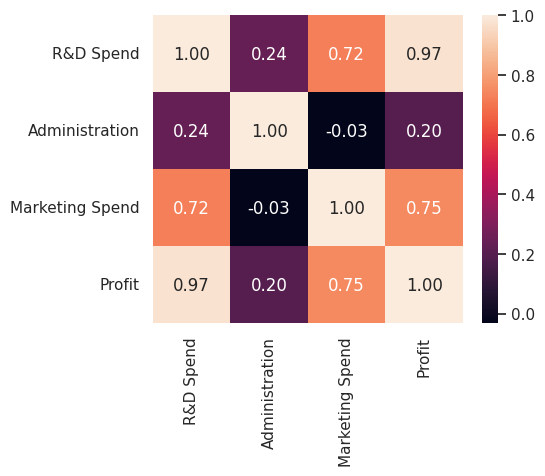

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# 07. Scatterplots (Numeric Features vs Profit)

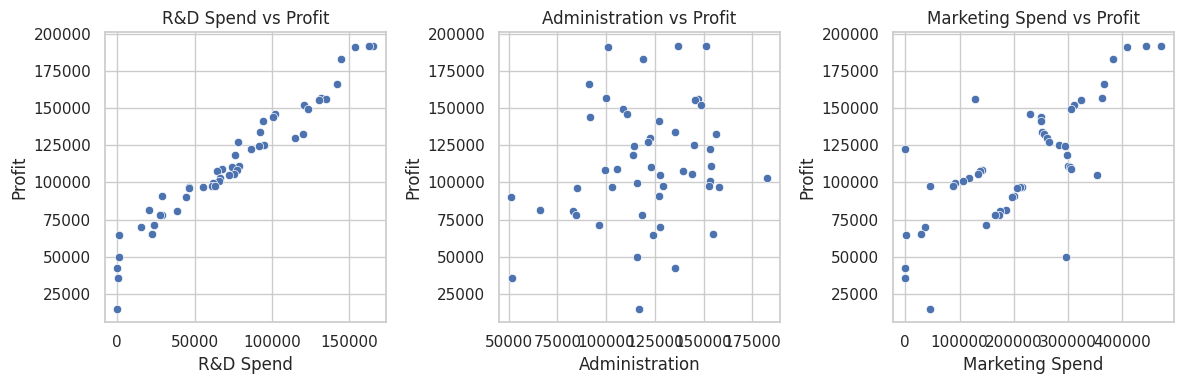

In [10]:
features = ['R&D Spend', 'Administration', 'Marketing Spend']
target = 'Profit'

plt.figure(figsize=(12,4))

for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")

plt.tight_layout()
plt.show()

# 08. Boxplot for Categorical Feature

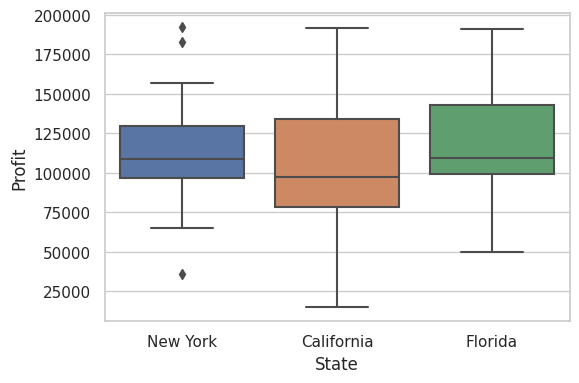

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='State', y='Profit', data=df)
plt.show()

# 09. Encode Categorical Feature

In [12]:
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


# 10. Prepare Features and Target

In [13]:
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

# 11. Train / Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40, 5)
X_test shape: (10, 5)
y_train shape: (40,)
y_test shape: (10,)


# 12. Train Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Training R²:", lr_model.score(X_train, y_train))
print("Test R²:", lr_model.score(X_test, y_test))

Training R²: 0.9537019995248526
Test R²: 0.8987266414328638


# 13. Model Coefficients

In [16]:
print("Intercept:", lr_model.intercept_)

coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})
coeff_df

Intercept: 54028.03959364578


,Feature,Coefficient
0,R&D Spend,0.805630
1,Administration,-0.068788
2,Marketing Spend,0.029855
3,State_Florida,938.793006
4,State_New York,6.987760


# 14. Predictions & Evaluation

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = lr_model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 9055.96
MAE: 6961.48
R²: 0.90


# 15. Scatterplot: Actual vs Predicted

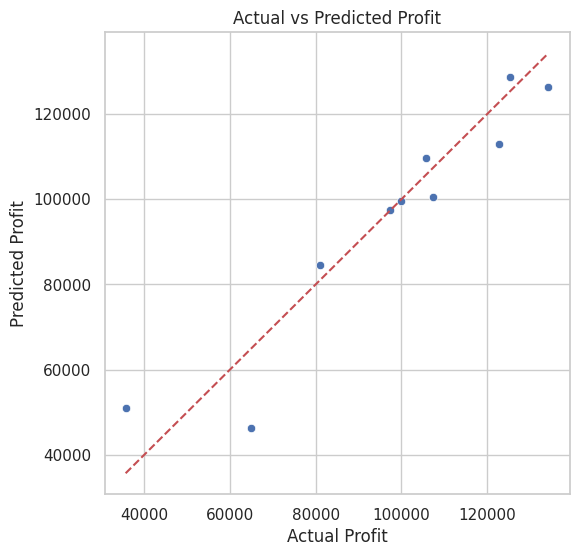

In [19]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# 16. Save Trained Model

In [20]:
import joblib
joblib.dump(lr_model, '/kaggle/working/lr_model.joblib')

['/kaggle/working/lr_model.joblib']